<a href="https://colab.research.google.com/github/rrrayhan/homecredit_vix/blob/main/Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


# **Load and Read Dataset**

In [2]:
app_train = pd.read_csv("FP/home-credit-default-risk/application_train.csv")

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **Check for Missing Value**

In [4]:
df = app_train.copy()

In [5]:
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/len(df)
dtypes = [df[col].dtype for col in df.columns]
df_null_data = pd.DataFrame({'total_null': total_null,
                            'data_type': dtypes,
                            'percent_missing': percent_missing})
df_null_data.sort_values('percent_missing', ascending=False, inplace=True)
null_data = df_null_data[df_null_data['percent_missing']>0].reset_index()
null_data

,index,total_null,data_type,percent_missing
0,COMMONAREA_AVG,214865,float64,69.872297
1,COMMONAREA_MODE,214865,float64,69.872297
2,COMMONAREA_MEDI,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953
9,LIVINGAPARTMENTS_MODE,210199,float64,68.354953


Drop features that have more than 40% missing value

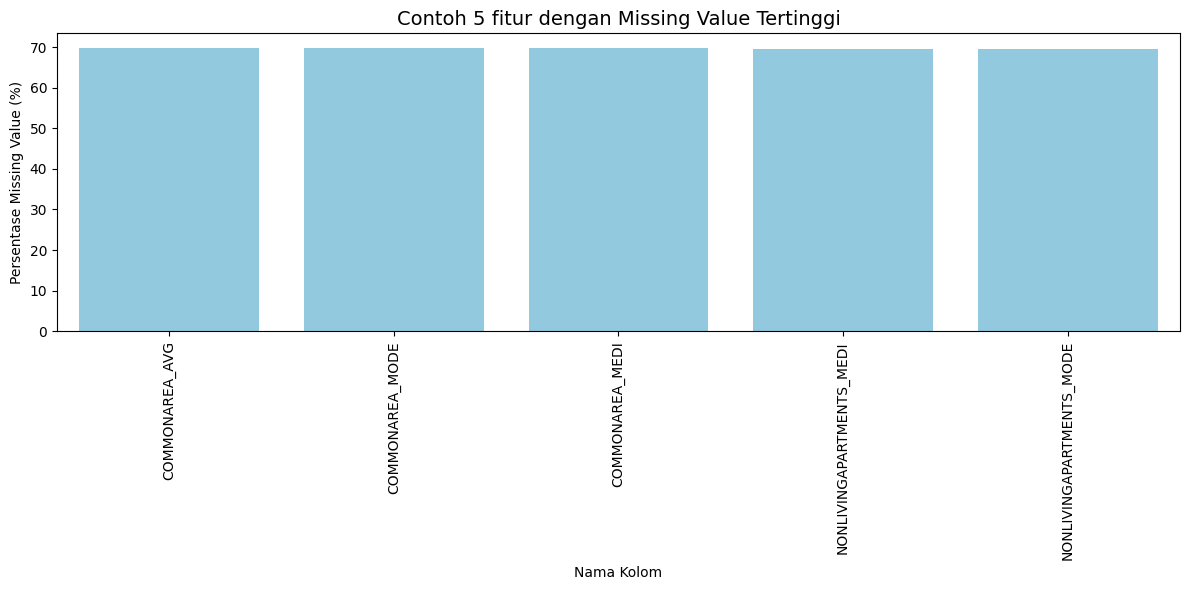

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter 20 kolom dengan missing value terbanyak (opsional)
top_null = null_data.head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='index', y='percent_missing', data=top_null, color='skyblue')

plt.title('Contoh 5 fitur dengan Missing Value Tertinggi', fontsize=14)
plt.xlabel('Nama Kolom')
plt.ylabel('Persentase Missing Value (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [7]:
null_cols = df_null_data.loc[df_null_data['percent_missing']> 40].index.tolist()

In [8]:
def null_cols(df):
    list_missing_cols = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI',
                     'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI',
                     'YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI',
                     'BASEMENTAREA_AVG','BASEMENTAREA_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
                     'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
                     'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
    df.drop(columns=list_missing_cols, inplace = True)

In [9]:
null_cols(df)

# **Check for Duplicate Value**

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicate value

# **Preprocessing**

In [11]:
df_preprocessing = df.copy()

In [12]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk,and majority on 0 value
    list_drop = ['ORGANIZATION_TYPE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_MOBIL','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' ,'AMT_REQ_CREDIT_BUREAU_QRT',
                 'WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION']
    df.drop(columns=list_drop, inplace = True)

    # Fill Numerical Null Value using Median because this Median is Robust
    list_num = ['AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())

    # EXT_SOURCE
    list_ext = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']
    for ext in list_ext:
        df[ext] = df[ext].fillna(0)

    # Fill Categorical Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')

    # Transformed These Features into Years
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)
    
    df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['AMT_CREDIT'] + 1)
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / (df['AMT_INCOME_TOTAL'] + 1)

     # Interaction Features
    df['AGE_EMP_INTERACTION'] = df['AGE'] * df['EMP_LENGTH']

    # Log Transformation
    df['LOG_AMT_INCOME_TOTAL'] = np.log1p(df['AMT_INCOME_TOTAL'])
    df['LOG_AMT_CREDIT'] = np.log1p(df['AMT_CREDIT'])

    # Replace Other to Non Dominant Values in Categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)

    # OCCUPATION_TYPE
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)

    # Adjusting String to Float
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)

    # Drop Row that contain XNA in Code Gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [13]:
preprocessing(df_preprocessing)

In [14]:
df_preprocessing.isna().sum().sum()

np.int64(0)

In [15]:
# Imputasi missing value dengan median
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

Missing values have all been filled

In [16]:
df_preprocessing.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000e+00
NAME_CONTRACT_TYPE,307511.0,0.904787,0.293509,0.000000,1.000000,1.000000,1.000000,1.000000e+00
CODE_GENDER,307511.0,0.341643,0.474261,0.000000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.000000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.000000,0.000000,1.000000,1.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.500000,16524.000000,24903.000000,34596.000000,2.580255e+05


In [17]:
# Drop Error Value from EMP_LENGTH
df_preprocessing = df_preprocessing[df_preprocessing['EMP_LENGTH'] <=100]

# **Data Exploration**

In [18]:
df_eda = df_preprocessing.copy()

Univariate Analysis

In [19]:
cat = df_eda.select_dtypes(include='object').columns
num = df_eda.select_dtypes(include='number').columns

In [20]:
print(len(cat))
print(len(num))

6
35


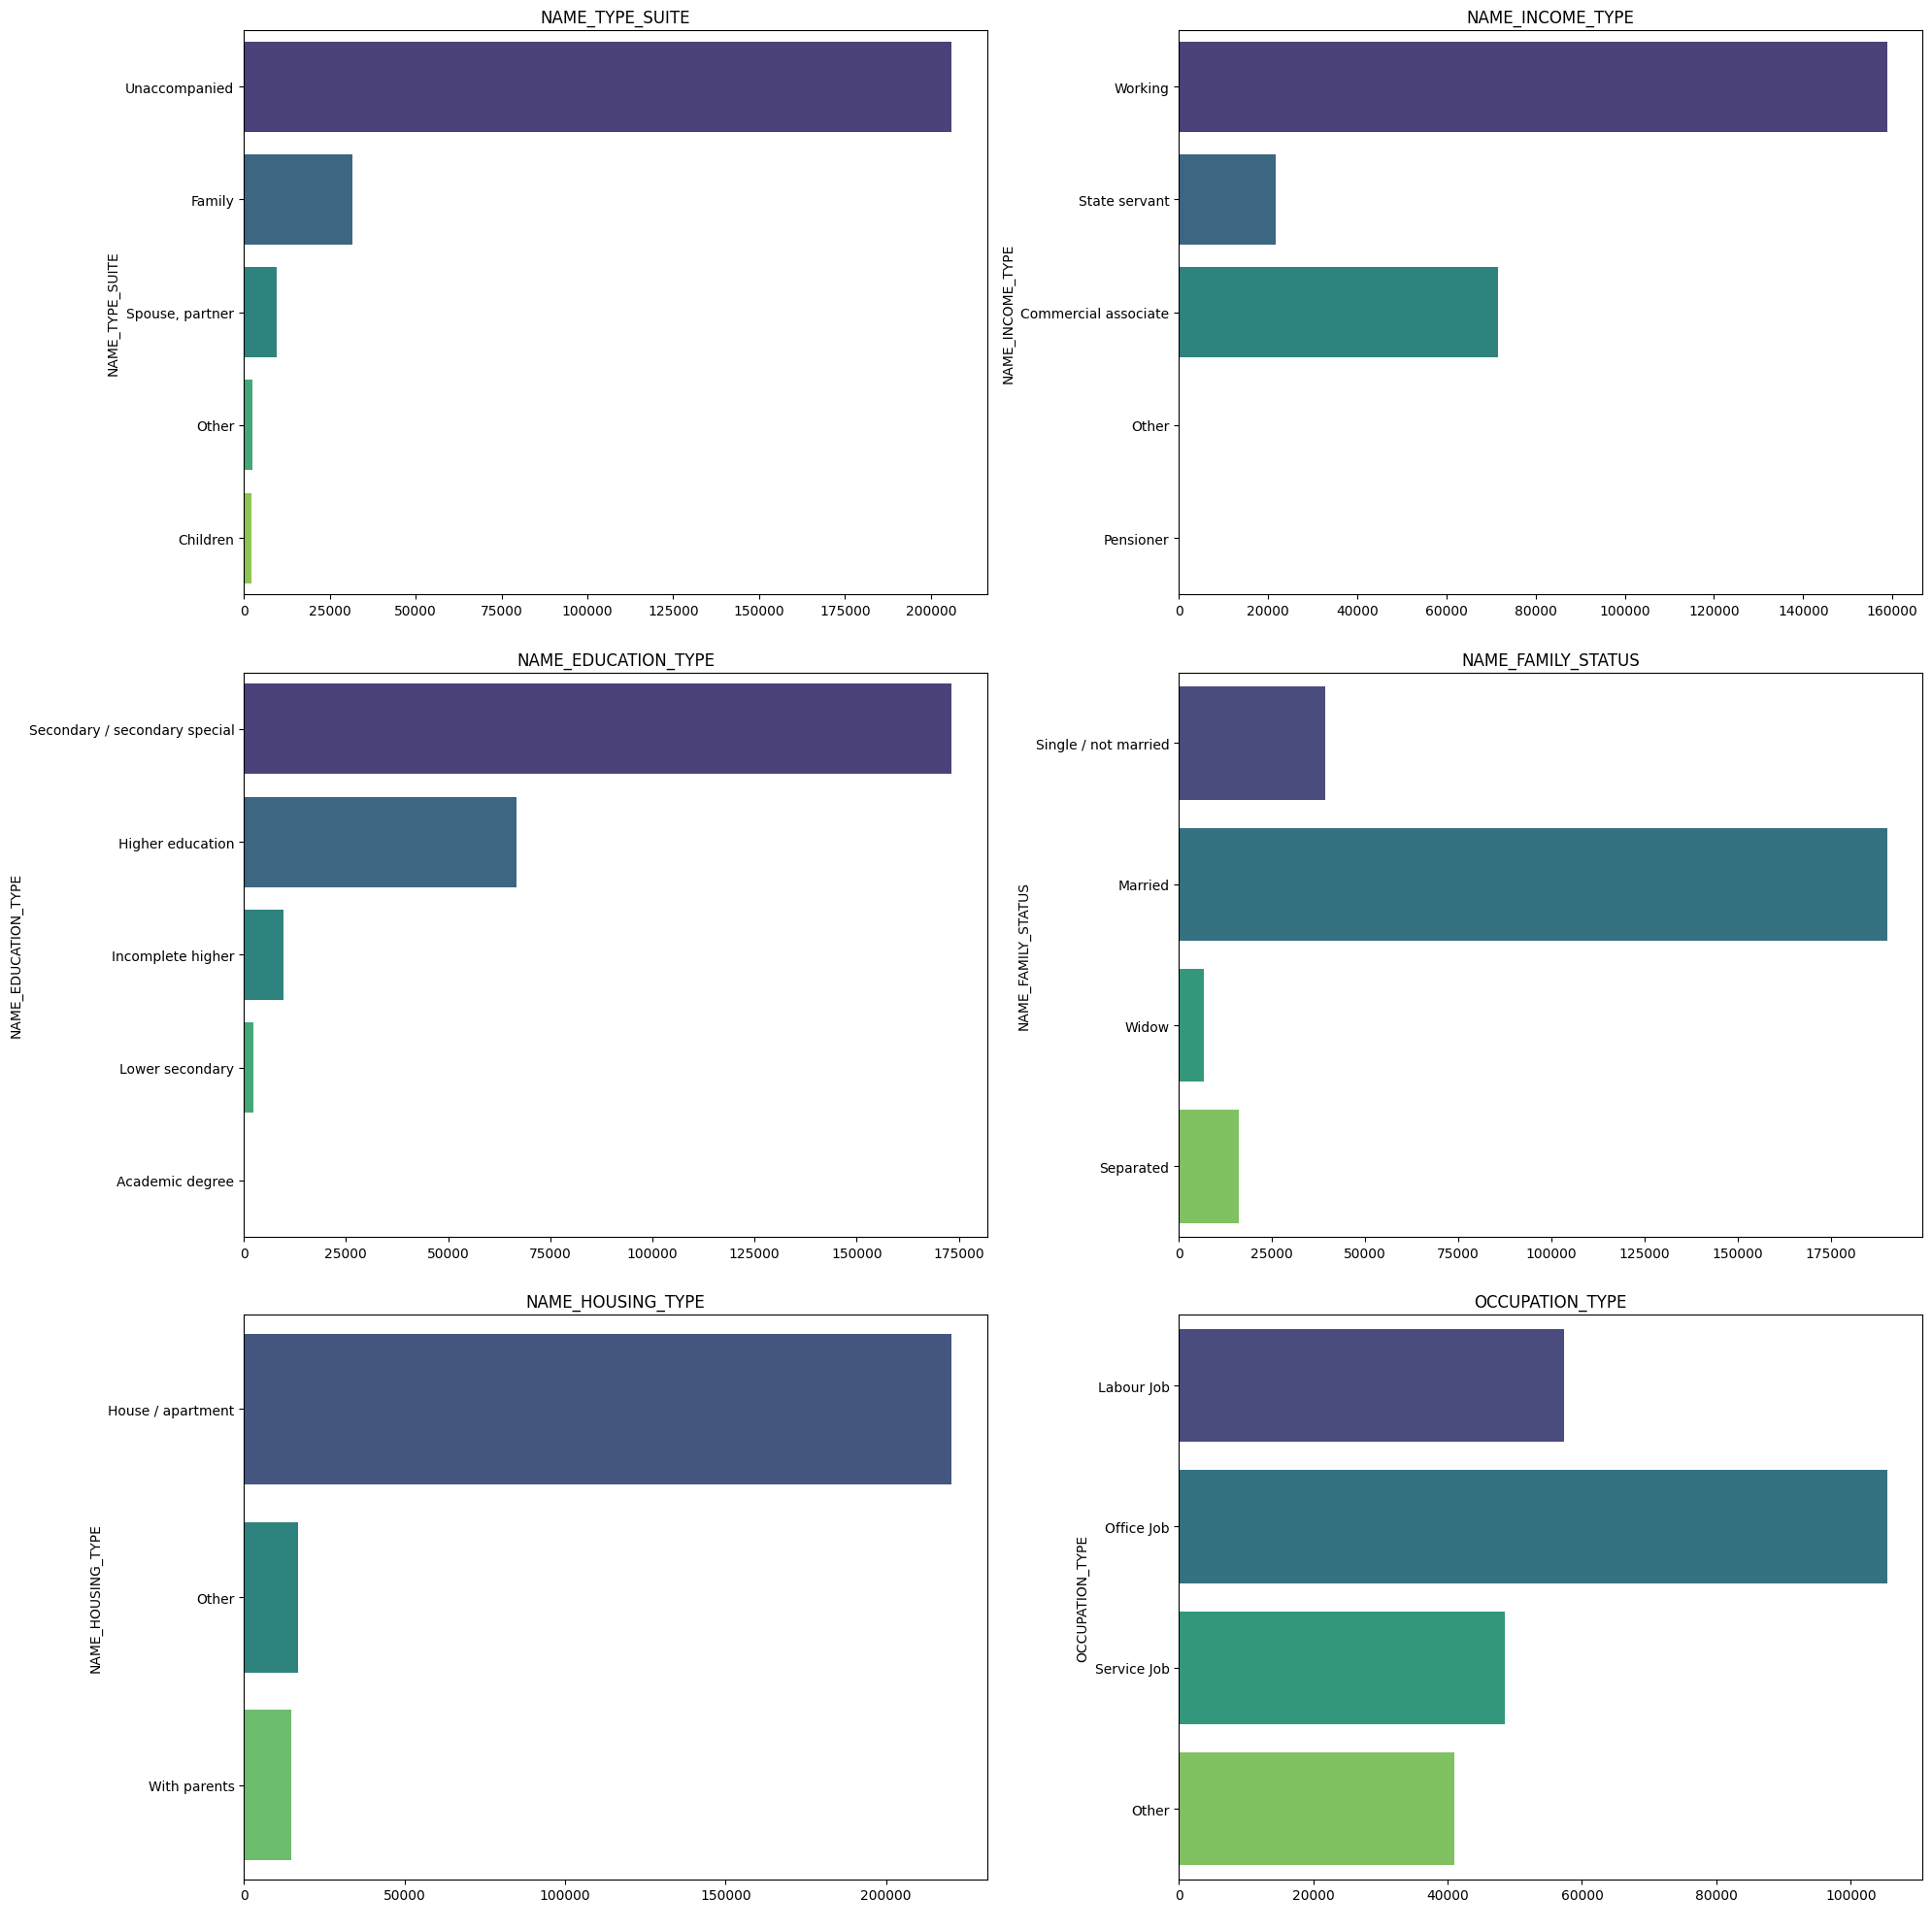

In [21]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

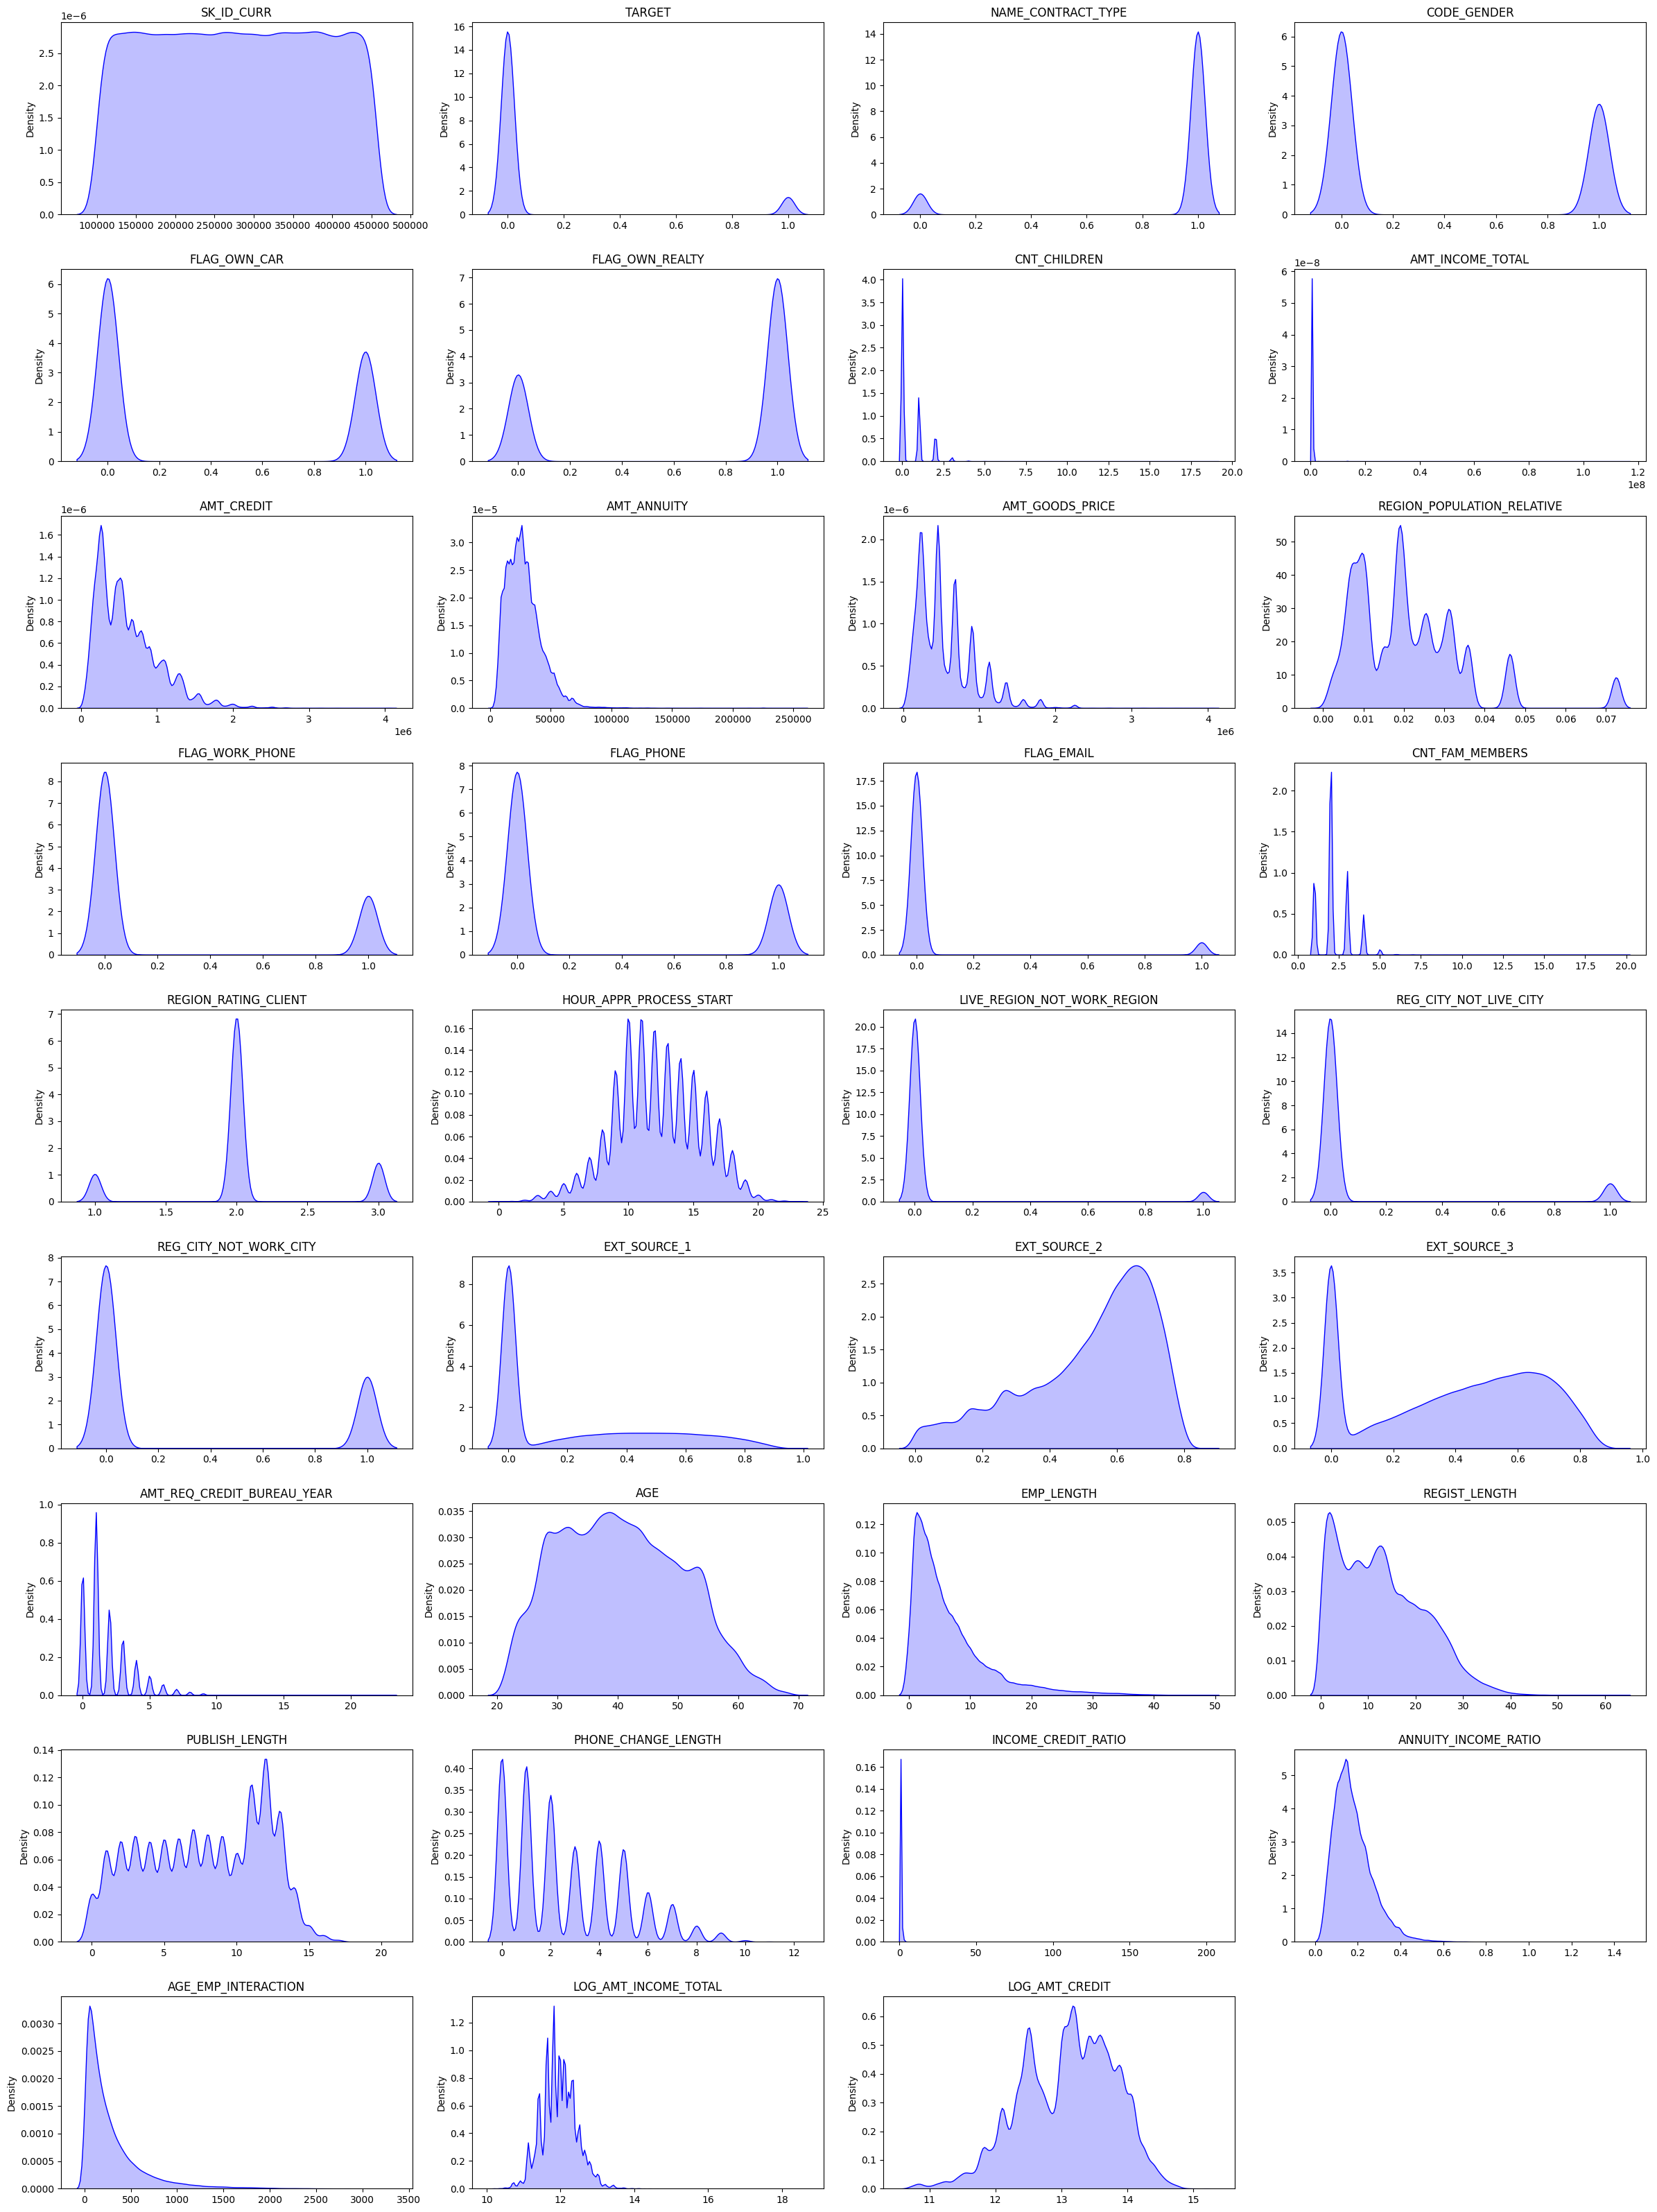

In [28]:
plt.figure(figsize=(24, 32))
for i in range(0, len(num)):
    plt.subplot(9, 4, i + 1)  # 9x4 = 36 slot, cukup untuk 33 variabel
    sns.kdeplot(x=df_preprocessing[num[i]], fill=True, color='blue')
    plt.title(num[i], fontsize=12)
    plt.xlabel('')
    plt.tight_layout()


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Income Type vs Target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='income_type', hue='target', palette='viridis')
plt.title('Income Type vs Target')
plt.xlabel('Income Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Education vs Target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='target', palette='magma')
plt.title('Education vs Target')
plt.xlabel('Education Level')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `income_type` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [32]:
# Rasio pengajuan diterima per income type (target == 0 dianggap diterima)
acceptance_rate = df_preprocessing[df_preprocessing['TARGET'] == 0]['NAME_INCOME_TYPE'].value_counts(normalize=True) / df_preprocessing['NAME_INCOME_TYPE'].value_counts()
acceptance_rate = acceptance_rate.fillna(0).sort_values(ascending=False)
print("Acceptance Rate per Income Type:")
print(acceptance_rate)


Acceptance Rate per Income Type:
NAME_INCOME_TYPE
Pensioner               0.000004
State servant           0.000004
Other                   0.000004
Commercial associate    0.000004
Working                 0.000004
dtype: float64


In [37]:
# Total pengajuan per income type
total_per_income = df_preprocessing['NAME_INCOME_TYPE'].value_counts()

# Pengajuan diterima (TARGET=0) per income type
accepted_per_income = df_preprocessing[df_preprocessing['TARGET'] == 0]['NAME_INCOME_TYPE'].value_counts()

# Hitung acceptance rate
acceptance_rate = (accepted_per_income / total_per_income).fillna(0).sort_values(ascending=False)

print("Acceptance Rate per Income Type:")
print(acceptance_rate)


Acceptance Rate per Income Type:
NAME_INCOME_TYPE
Pensioner               1.000000
State servant           0.942450
Other                   0.939394
Commercial associate    0.925157
Working                 0.904115
Name: count, dtype: float64


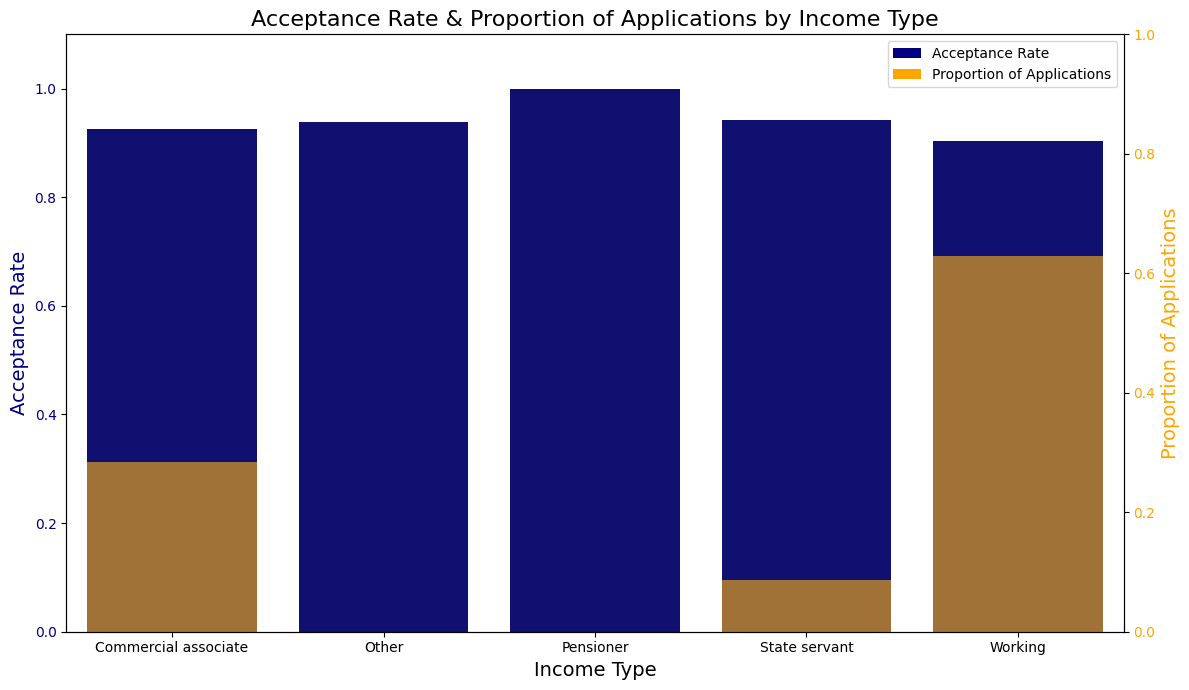

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Data contoh
data = {
    'Income_Type': ['Commercial associate', 'Other', 'Pensioner', 'State servant', 'Working'],
    'Acceptance_Rate': [0.925157, 0.939394, 1.0, 0.94245, 0.904115],
    'Application_Proportion': [0.284040, 0.000131, 0.000040, 0.086076, 0.629713]
}
df_vis = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar chart untuk Acceptance Rate (warna biru tua)
sns.barplot(x='Income_Type', y='Acceptance_Rate', data=df_vis, color='navy', ax=ax1)
ax1.set_ylabel('Acceptance Rate', color='navy', fontsize=14)
ax1.set_xlabel('Income Type', fontsize=14)
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 1.1)
ax1.set_title('Acceptance Rate & Proportion of Applications by Income Type', fontsize=16)

# Axis kedua untuk Proportion of Applications (warna oranye cerah)
ax2 = ax1.twinx()
sns.barplot(x='Income_Type', y='Application_Proportion', data=df_vis, color='orange', alpha=0.7, ax=ax2)
ax2.set_ylabel('Proportion of Applications', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 1)

# Legend manual
legend_elements = [
    Patch(facecolor='navy', label='Acceptance Rate'),
    Patch(facecolor='orange', label='Proportion of Applications')
]
ax1.legend(handles=legend_elements, loc='upper right')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [36]:
# Proporsi pengajuan tiap income type
proporsi_pengajuan = (total_per_income / len(df_preprocessing)).sort_values(ascending=False)

# Gabungkan acceptance rate dan proporsi pengajuan jadi satu dataframe
df_insight = pd.DataFrame({
    'Acceptance Rate': acceptance_rate,
    'Proportion of Applications': proporsi_pengajuan
})

print(df_insight)


                      Acceptance Rate  Proportion of Applications
NAME_INCOME_TYPE                                                 
Commercial associate         0.925157                    0.284040
Other                        0.939394                    0.000131
Pensioner                    1.000000                    0.000040
State servant                0.942450                    0.086076
Working                      0.904115                    0.629713


In [34]:
# Proporsi pengajuan dari tiap kategori income_type
submission_share = df_preprocessing['TARGET'] .value_counts(normalize=True)
print("Proporsi Pengajuan per Income Type:")
print(submission_share)


Proporsi Pengajuan per Income Type:
TARGET
0    0.9134
1    0.0866
Name: proportion, dtype: float64


In [42]:
# Tabel frekuensi Education Type vs Target
edu_target_counts = df_preprocessing.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack(fill_value=0)
print("Education Type vs Target Counts:")
print(edu_target_counts)

print("\n")

# Tabel frekuensi Contract Type vs Target
contract_target_counts = df_preprocessing.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack(fill_value=0)
print("Contract Type vs Target Counts:")
print(contract_target_counts)


Education Type vs Target Counts:
TARGET                              0      1
NAME_EDUCATION_TYPE                         
Academic degree                   135      3
Higher education                63000   3669
Incomplete higher                8909    848
Lower secondary                  1972    315
Secondary / secondary special  156286  17000


Contract Type vs Target Counts:
TARGET                   0      1
NAME_CONTRACT_TYPE               
0                    24449   1464
1                   205853  20371


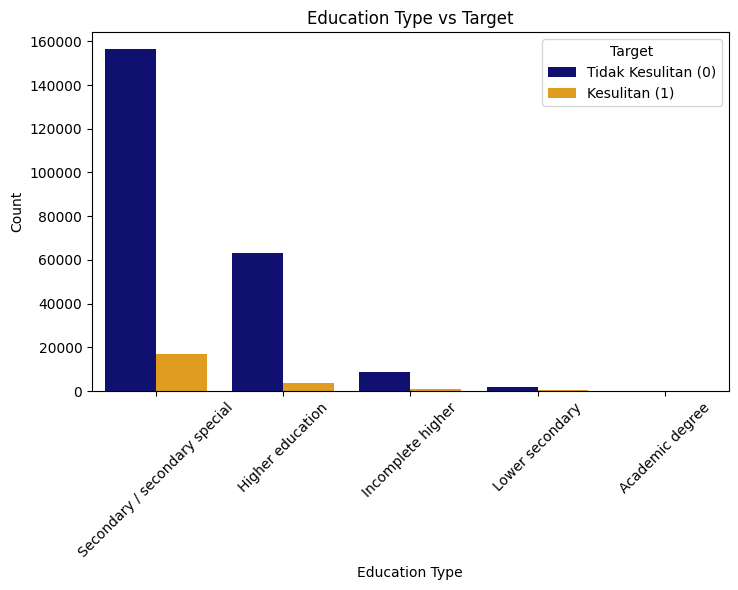

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# Plot 1: Education Type vs Target
plt.subplot(1, 2, 1)
sns.countplot(data=df_preprocessing, x='NAME_EDUCATION_TYPE', hue='TARGET', palette=['navy', 'orange'])
plt.title('Education Type vs Target')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Tidak Kesulitan (0)', 'Kesulitan (1)'])

plt.tight_layout()
plt.show()


Bivariate Analysis

In [ ]:
df_eda['TARGET'].value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

Interpretation:
* 0 - clients who do not have credit repayment difficulties.
* 1 - clients who have credit repayment difficulties.

In [24]:
target_map = {
    0: 'Tidak kesulitan',
    1: 'Kesulitan'
}

df_eda['TARGET'] = df_eda['TARGET'].map(target_map)

In [25]:
df_eda['TARGET'].value_counts()

TARGET
Tidak kesulitan    230302
Kesulitan           21835
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentages of\nCredit Target\n')

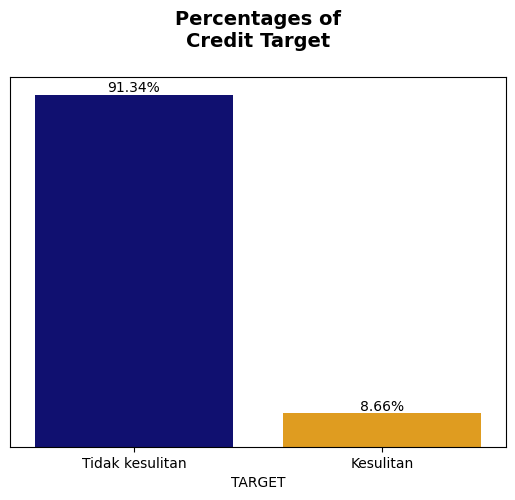

In [45]:
counts = df_eda['TARGET'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette=['navy', 'orange'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of\nCredit Target\n', fontsize=14, fontweight = 'bold')

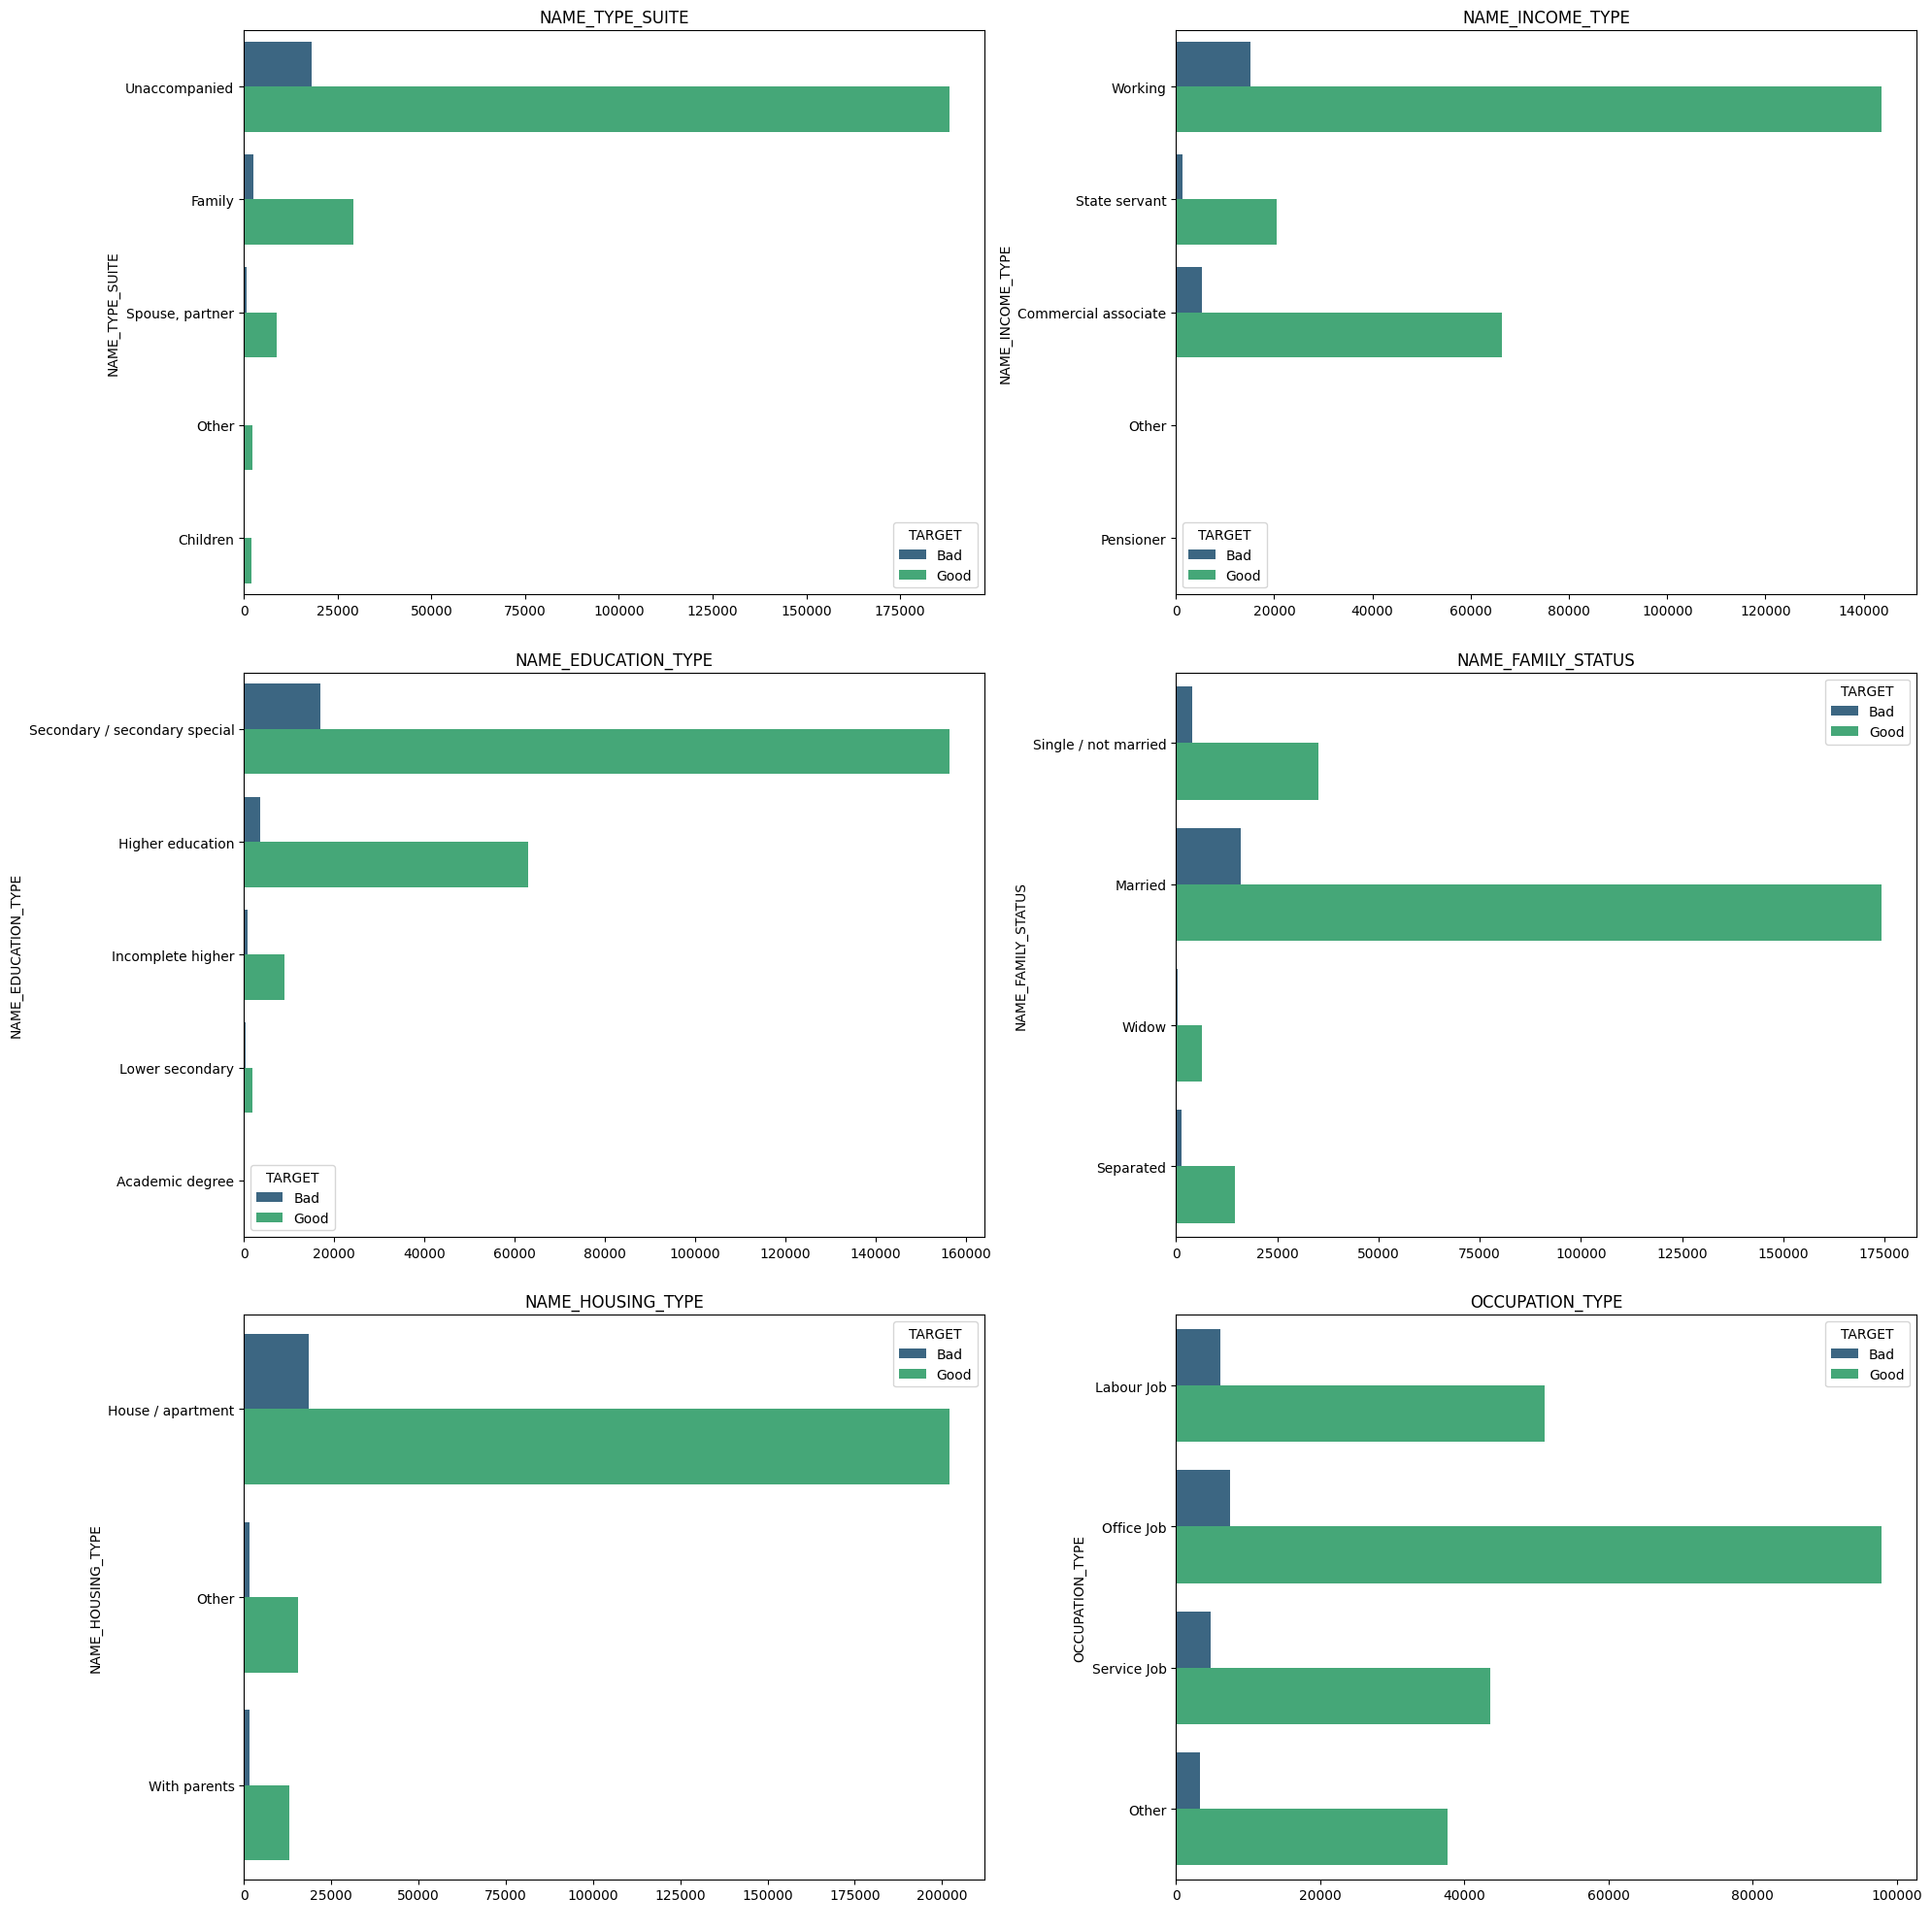

In [31]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], palette='viridis', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

# **Features**

In [32]:
df_select = df_eda.copy()
df_select['TARGET'] = df_select['TARGET'].map({'Good': 0, 'Bad': 1})

In [33]:
feats = ['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE',
        'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AGE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
        'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL','ANNUITY_INCOME_RATIO', 'INCOME_CREDIT_RATIO', 'CNT_CHILDREN', 'TARGET']

In [34]:
df_selected = df_select[feats]

In [35]:
df_selected.sample(10).T

,94499,115039,92216,268371,54778,158638,81160,144750,133115,100839
NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
CODE_GENDER,0,0,1,0,0,0,1,0,0,0
NAME_CONTRACT_TYPE,0,1,1,1,1,1,1,1,1,1
EXT_SOURCE_3,0.0,0.0,0.45969,0.542445,0.4171,0.65126,0.0,0.657784,0.486653,0.694093
EXT_SOURCE_2,0.032495,0.575743,0.512737,0.602959,0.262258,0.321969,0.807744,0.262258,0.652234,0.613785
AGE,49.0,53.0,24.0,54.0,51.0,40.0,38.0,56.0,49.0,48.0
REGION_RATING_CLIENT,2,2,2,2,2,2,1,2,2,2
REG_CITY_NOT_WORK_CITY,0,1,0,0,0,0,0,1,0,0
REG_CITY_NOT_LIVE_CITY,0,0,0,0,0,0,0,0,0,0
AMT_CREDIT,202500.0,106974.0,389844.0,71955.0,50940.0,634482.0,1762110.0,291384.0,808650.0,1288350.0


In [36]:
df_encod = df_selected.copy()

In [37]:
cat = df_encod.loc[:, (df_encod.dtypes == 'object')].columns.tolist()
cat

['NAME_EDUCATION_TYPE']

In [38]:
dict_edu = {
    'Lower secondary' : 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3}
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].map(dict_edu)

In [39]:
most_frequent_value = df_encod['NAME_EDUCATION_TYPE'].mode()[0]
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].fillna(most_frequent_value)

In [40]:
df_encod.sample(10).T

,774,196658,108325,162331,36884,219045,262395,150023,13479,228248
NAME_EDUCATION_TYPE,1.000000,2.000000,3.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,3.000000
CODE_GENDER,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000
NAME_CONTRACT_TYPE,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
EXT_SOURCE_3,0.810618,0.441836,0.000000,0.332851,4.686597e-01,0.410103,0.304672,0.000000,0.117614,0.342529
EXT_SOURCE_2,0.696404,0.600302,0.446031,0.528399,3.412016e-01,0.681618,0.740670,0.129321,0.671865,0.244593
AGE,52.000000,38.000000,54.000000,44.000000,4.500000e+01,52.000000,43.000000,46.000000,49.000000,29.000000
REGION_RATING_CLIENT,2.000000,2.000000,2.000000,3.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000
REG_CITY_NOT_WORK_CITY,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
REG_CITY_NOT_LIVE_CITY,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000
AMT_CREDIT,900000.000000,825588.000000,123993.000000,269550.000000,1.200744e+06,545040.000000,315000.000000,942300.000000,742500.000000,473760.000000


# **Modeling**

In [41]:
df_model = df_encod.copy()

In [42]:
# mengelompokkan fitur dan target
x = df_model.drop(columns='TARGET').copy()
y = df_model['TARGET'].copy()

In [43]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print(x_train.shape, x_test.shape)

(201709, 15) (50428, 15)


In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# -----------------------------------------------------
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [45]:
y_train.shape

(201709,)

In [46]:
round(100 * y_train.value_counts() / y_train.shape[0],2)

TARGET
0    91.29
1     8.71
Name: count, dtype: float64

In [47]:
nan_values = df_model.isna().any()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values == True])

Columns with NaN values:
Series([], dtype: bool)


In [48]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------------------
sampling_methods = {'SMOTE': SMOTE(random_state=123),
                    'RandomOverSampler': RandomOverSampler(random_state=123),
                    'RandomUnderSampler': RandomUnderSampler(random_state=123)}

# ----------------------------------------------------------------------
for name, sampler in sampling_methods.items():
    x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    m = XGBClassifier(random_state=123)
    m.fit(x_resampled, y_resampled)
    y_pred = m.predict(x_test)

    # print the classification report
    print(f"Classification report for {name}")
    print(classification_report_imbalanced(y_test, y_pred))

Classification report for SMOTE
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.81      0.38      0.87      0.56      0.32     46153
          1       0.16      0.38      0.81      0.22      0.56      0.30      4275

avg / total       0.87      0.77      0.42      0.81      0.56      0.32     50428

Classification report for RandomOverSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.71      0.62      0.82      0.67      0.45     46153
          1       0.17      0.62      0.71      0.26      0.67      0.44      4275

avg / total       0.89      0.71      0.63      0.77      0.67      0.45     50428

Classification report for RandomUnderSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.65      0.66      0.77      0.65      0.43     46153
          1       0.15      0.66      0.65

In [49]:
rus = RandomUnderSampler(random_state=123)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [50]:
x_train_rus.shape

(35120, 15)

In [51]:
round(100 * y_train_rus.value_counts() / y_train_rus.shape[0],2)

TARGET
0    50.0
1    50.0
Name: count, dtype: float64

# **Model Experiment and Evaluation**

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [53]:
def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(x_test)

    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_rus)

    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train_rus, y_pred_proba_train[:, 1])

    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

In [54]:
def c_matrix_viz(model) :
    y_pred = model.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # mengatur matrix
    fig = plt.figure(figsize = (5,3))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # display matrix
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})

In [55]:
def plot_roc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])

    auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [56]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# **Pre-Tuning**

Logistic Regression

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     46153
           1       0.15      0.65      0.25      4275

    accuracy                           0.66     50428
   macro avg       0.55      0.66      0.51     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7115
AUC Train scores: 0.7078
------------------------------------------------------- 



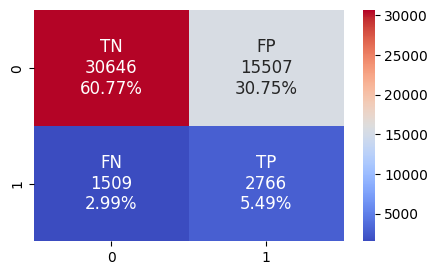

In [57]:
logr = LogisticRegression(random_state=123)
logr.fit(x_train_rus, y_train_rus)

predict(logr)

Random Forest

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.66      0.78     46153
           1       0.15      0.66      0.25      4275

    accuracy                           0.66     50428
   macro avg       0.55      0.66      0.52     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7203
AUC Train scores: 1.0
------------------------------------------------------- 



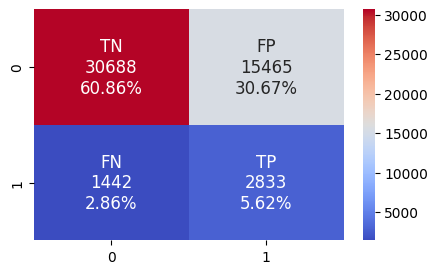

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(x_train_rus, y_train_rus)

predict(rf)

XGBoost

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     46153
           1       0.15      0.66      0.24      4275

    accuracy                           0.65     50428
   macro avg       0.55      0.65      0.51     50428
weighted avg       0.89      0.65      0.73     50428

------------------------------------------------------- 

AUC Test score: 0.7152
AUC Train scores: 0.871
------------------------------------------------------- 



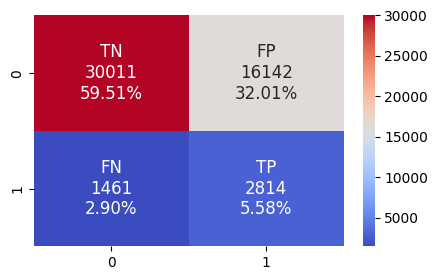

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(x_train_rus, y_train_rus)

predict(xgb)

LGBM

[LightGBM] [Info] Number of positive: 17560, number of negative: 17560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 35120, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.66      0.78     46153
           1       0.16      0.69      0.26      4275

    accuracy                           0.66     50428
   macro avg       0.56      0.67      0.52     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7334
AUC Train scores: 0.7864
------------------------------------------------------- 



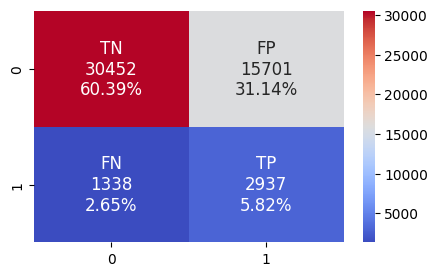

In [69]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=123)

# Melatih mol LGBM
lgbm.fit(x_train_rus, y_train_rus)
predict(lgbm)

extra trees

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     46153
           1       0.15      0.66      0.24      4275

    accuracy                           0.65     50428
   macro avg       0.55      0.65      0.51     50428
weighted avg       0.89      0.65      0.73     50428

------------------------------------------------------- 

AUC Test score: 0.7082
AUC Train scores: 1.0
------------------------------------------------------- 



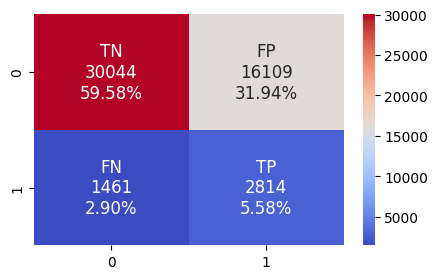

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(random_state=123)

extra_trees.fit(x_train_rus, y_train_rus)
predict(extra_trees)


# **Tuning**

Logistic Regression

In [60]:
from sklearn import model_selection

# -------------------------------------------------------------------------------
# weights = np.linspace(0.0,0.99,200)
param_distributions = {'class_weight': [{0: 7, 1: 3}],
                       'C': np.logspace(-3, 3, 7),
                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                      }

# -------------------------------------------------------------------------------
logreg = LogisticRegression(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
logreg_tuned = model_selection.RandomizedSearchCV(logreg, param_distributions, n_jobs = -1,
                                   n_iter=100, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
logreg_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", logreg_tuned.best_params_)

Best parameters:  {'solver': 'newton-cg', 'class_weight': {0: 7, 1: 3}, 'C': 0.01}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     46153
           1       0.24      0.24      0.24      4275

    accuracy                           0.87     50428
   macro avg       0.58      0.58      0.58     50428
weighted avg       0.87      0.87      0.87     50428

------------------------------------------------------- 

AUC Test score: 0.7115
AUC Train scores: 0.7078
------------------------------------------------------- 



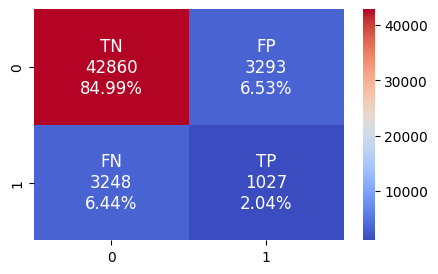

In [61]:
predict(logreg_tuned)

Random Forest

In [62]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'class_weight': [{0: 7, 1: 3}]
                      }

# -------------------------------------------------------------------------------
rf = RandomForestClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
rf_tuned = model_selection.RandomizedSearchCV(rf, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=42)

# fit model
rf_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", rf_tuned.best_params_)

Best parameters:  {'n_estimators': 300, 'max_depth': 10, 'class_weight': {0: 7, 1: 3}}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     46153
           1       0.26      0.26      0.26      4275

    accuracy                           0.87     50428
   macro avg       0.59      0.60      0.59     50428
weighted avg       0.87      0.87      0.87     50428

------------------------------------------------------- 

AUC Test score: 0.7264
AUC Train scores: 0.8089
------------------------------------------------------- 



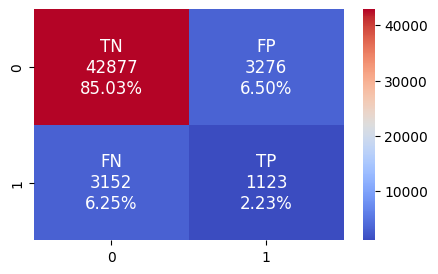

In [63]:
predict(rf_tuned)

XGBoost

In [64]:
param_distributions = {
    'learning_rate': [0.1, 0.2, 0,3, 0.4],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0, 1.5, 2.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      }

# -------------------------------------------------------------------------------
xgb = XGBClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
xgb_tuned = model_selection.RandomizedSearchCV(xgb, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
xgb_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", xgb_tuned.best_params_)

Best parameters:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     46153
           1       0.16      0.69      0.26      4275

    accuracy                           0.67     50428
   macro avg       0.56      0.68      0.52     50428
weighted avg       0.89      0.67      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7348
AUC Train scores: 0.7503
------------------------------------------------------- 



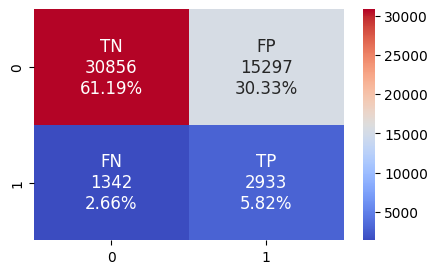

In [ ]:
predict(xgb_tuned)

In [ ]:
lgbm

In [72]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

# Definisikan parameter distribusi untuk tuning
param_distributions = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Inisialisasi model LGBM
lgbm = lgb.LGBMClassifier(random_state=123)

# Setup Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Randomized Search CV
lgbm_tuned = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=100,
    cv=kfold,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=123
)

# Fit model
lgbm_tuned.fit(x_train_rus, y_train_rus)

# Cetak parameter terbaik
print("Best parameters: ", lgbm_tuned.best_params_)

[LightGBM] [Info] Number of positive: 17560, number of negative: 17560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 35120, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters:  {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 30, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.66      0.78     46153
           1       0.16      0.69      0.26      4275

    accuracy                           0.66     50428
   macro avg       0.56      0.68      0.52     50428
weighted avg       0.89      0.66      0.74     50428

------------------------------------------------------- 

AUC Test score: 0.7345
AUC Train scores: 0.7609
------------------------------------------------------- 



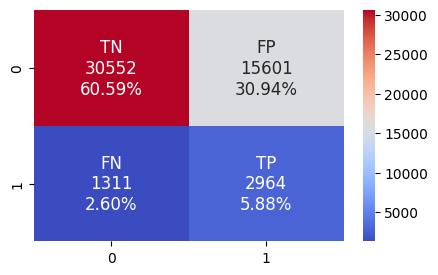

In [73]:
predict(lgbm_tuned)

extra tress

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

# Definisikan parameter distribusi untuk tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi model Extra Trees
extra_trees = ExtraTreesClassifier(random_state=123)

# Setup Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Randomized Search CV
extra_trees_tuned = RandomizedSearchCV(
    estimator=extra_trees,
    param_distributions=param_distributions,
    n_iter=100,
    cv=kfold,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=123
)

# Fit model
extra_trees_tuned.fit(x_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", extra_trees_tuned.best_params_)


KeyboardInterrupt: 

Kesimpulan:

Setelah dilakukan evaluasi model dan berdasarkan skor AUC pada data pengujian (test), model XGBoost memiliki skor tertinggi yaitu 0.7326 tetapi memiliki accuracy 0.68, diikuti oleh model Random Forest dengan skor 0.7259 dan accuracy 0.87, dan model Logistic Regression dengan skor 0.7096 dan accuracy 0.86 . Tetapi  kelebihan model XGBoost adalah memiliki waktu pelatihan yang relatif lebih cepat dibandingkan dengan LogisticRegression dan RandomForest. Jadi, dalam kasus ini, berdasarkan skor AUC pada data pengujian dan keakurasian model dalam membedakan kelas adalah model Random Forest.